### Import Required Libraries

In [ ]:
# Install if needed (only if error comes later)
# !pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for pretty plots
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
# Load the datasets
casualties_gaza = pd.read_csv('cleaned_casualties_daily.csv')
casualties_west_bank = pd.read_csv('cleaned_west_bank_daily.csv')
press_killed = pd.read_csv('cleaned_press_killed_in_gaza.csv')
infrastructure_damage = pd.read_csv('cleaned_infrastructure_damaged.csv')

# Preview the datasets
casualties_gaza.head()


,report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
0,2023-10-07,mohtel,24,0,232,232,232,232,0,0,1610,1610,1610,0,6.0,6,1.0,1
1,2023-10-08,mohtel,24,0,138,370,138,370,78,41,1788,178,1788,0,0.0,6,1.0,1
2,2023-10-09,mohtel,24,8,190,560,190,560,91,61,2271,483,2271,0,6.0,6,3.0,3
3,2023-10-10,mohtel,24,8,340,900,340,900,260,230,4000,1729,4000,0,0.0,6,7.0,7
4,2023-10-11,gmotel,24,23,200,1100,200,1100,398,230,5184,1184,5184,0,10.0,10,0.0,7


In [ ]:
casualties_gaza.info()
casualties_west_bank.info()
press_killed.info()
infrastructure_damage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   report_date              554 non-null    object 
 1   report_source            554 non-null    object 
 2   report_period            554 non-null    int64  
 3   ext_massacres_cum        554 non-null    int64  
 4   killed                   554 non-null    int64  
 5   killed_cum               554 non-null    int64  
 6   ext_killed               554 non-null    int64  
 7   ext_killed_cum           554 non-null    int64  
 8   ext_killed_children_cum  554 non-null    int64  
 9   ext_killed_women_cum     554 non-null    int64  
 10  injured_cum              554 non-null    int64  
 11  ext_injured              554 non-null    int64  
 12  ext_injured_cum          554 non-null    int64  
 13  ext_civdef_killed_cum    554 non-null    int64  
 14  med_killed_cum           5

# **Exploratory Data Analysis**

## Plot Daily Casualties (Line Chart)

In [ ]:
# Convert report_date to datetime
casualties_gaza['report_date'] = pd.to_datetime(casualties_gaza['report_date'])

In [ ]:
# Make sure 'report_date' is datetime type
casualties_gaza['report_date'] = pd.to_datetime(casualties_gaza['report_date'])

# Double check
print(casualties_gaza['report_date'].dtypes)

datetime64[ns]


In [ ]:
# Check minimum and maximum dates
print("Min Date:", casualties_gaza['report_date'].min())
print("Max Date:", casualties_gaza['report_date'].max())

Min Date: 2023-10-07 00:00:00
Max Date: 2025-04-12 00:00:00


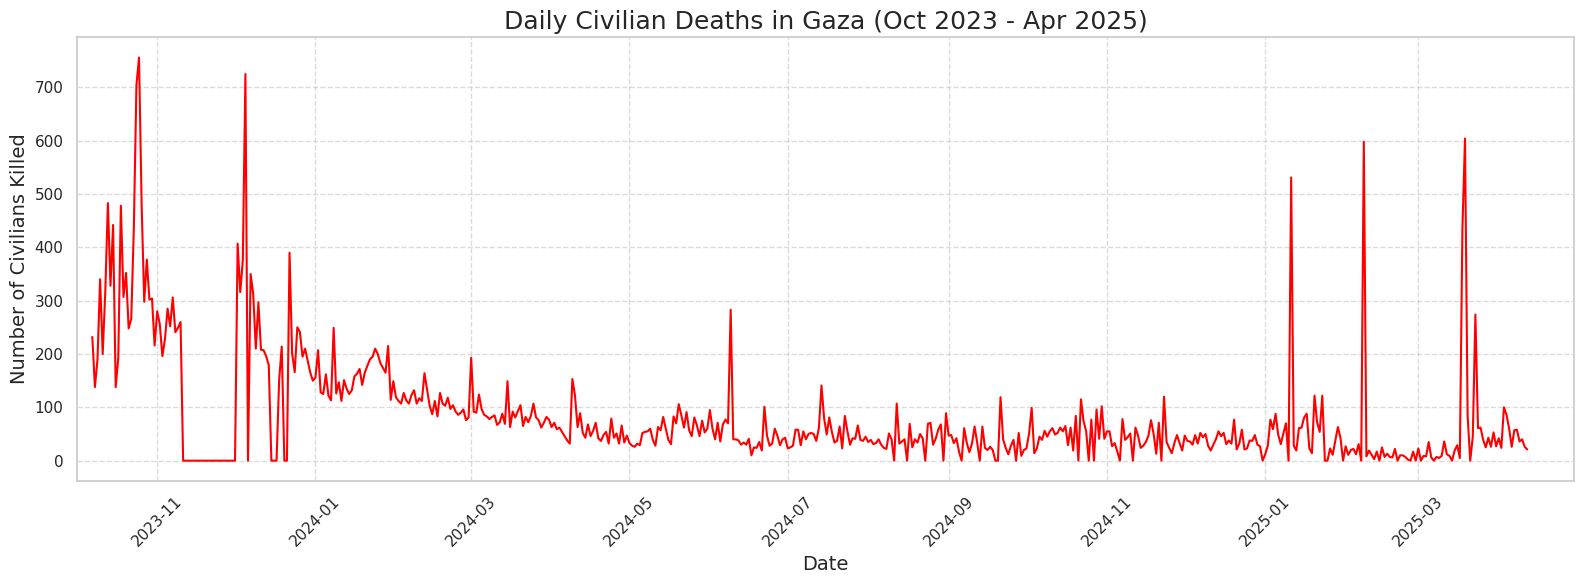

In [ ]:
import pandas as pd

# Plot clean Daily Casualties Line Chart
plt.figure(figsize=(16,6))
sns.lineplot(data=casualties_gaza, x='report_date', y='killed', color='red')
plt.title('Daily Civilian Deaths in Gaza (Oct 2023 - Apr 2025)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Civilians Killed', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# ✅ Correct way: Convert strings to datetime
plt.xlim([pd.to_datetime('2023-10-01'), pd.to_datetime('2025-04-30')])

plt.tight_layout()
plt.show()


## Monthly Aggregation (Bar Chart)

In [ ]:
# Create 'month_year' column
casualties_gaza['month_year'] = casualties_gaza['report_date'].dt.to_period('M')

In [ ]:
# Group by month and sum killed
monthly_casualties = casualties_gaza.groupby('month_year')['killed'].sum().reset_index()

# Convert 'month_year' back to string for cleaner plotting
monthly_casualties['month_year'] = monthly_casualties['month_year'].astype(str)

<ipython-input-18-30e6e68d2cf6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_casualties, x='month_year', y='killed', palette='Reds')


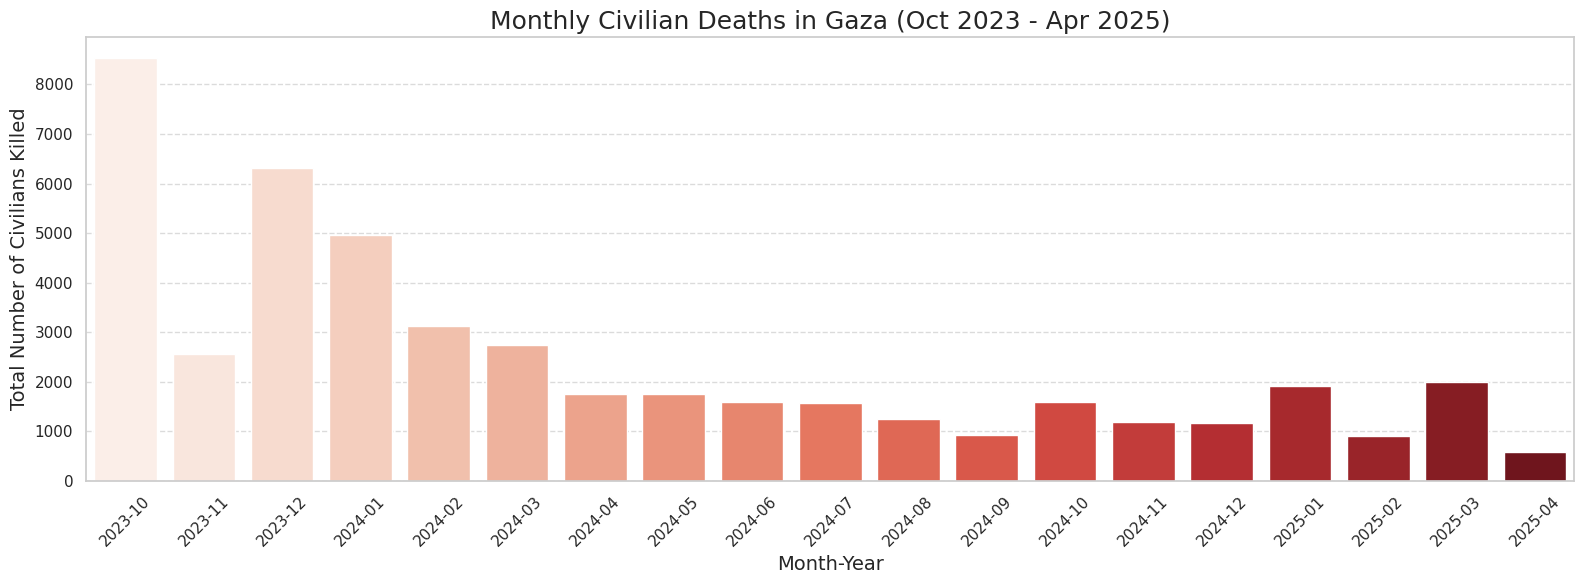

In [ ]:
# Plot Monthly Casualties Bar Chart
plt.figure(figsize=(16,6))
sns.barplot(data=monthly_casualties, x='month_year', y='killed', palette='Reds')
plt.title('Monthly Civilian Deaths in Gaza (Oct 2023 - Apr 2025)', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Number of Civilians Killed', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## West Bank Casualties EDA

In [ ]:
# Convert 'report_date' to datetime
casualties_west_bank['report_date'] = pd.to_datetime(casualties_west_bank['report_date'])

# Double check
print(casualties_west_bank['report_date'].dtypes)

datetime64[ns]


In [ ]:
print("Min Date:", casualties_west_bank['report_date'].min())
print("Max Date:", casualties_west_bank['report_date'].max())

Min Date: 2023-10-07 00:00:00
Max Date: 2025-04-12 00:00:00


In [ ]:
# Reload the cleaned West Bank dataset
casualties_west_bank = pd.read_csv('cleaned_west_bank_daily.csv')

# Convert report_date to datetime
casualties_west_bank['report_date'] = pd.to_datetime(casualties_west_bank['report_date'])

# Check columns
print(casualties_west_bank.columns)

Index(['report_date', 'verified.killed', 'verified.killed_cum',
       'verified.injured', 'verified.injured_cum', 'verified.killed_children',
       'verified.killed_children_cum', 'verified.injured_children',
       'verified.injured_children_cum', 'killed_cum', 'killed_children_cum',
       'injured_cum', 'injured_children_cum', 'settler_attacks_cum',
       'flash_source'],
      dtype='object')


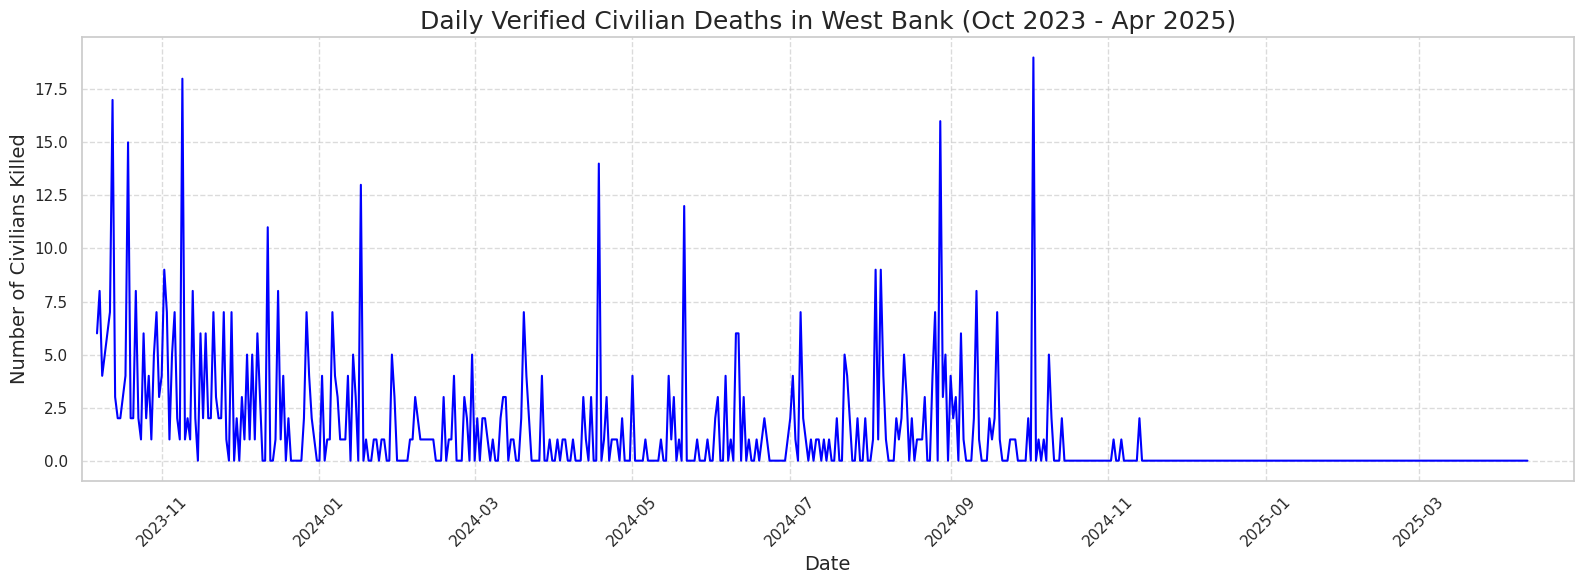

In [ ]:
# Plot Daily Casualties in West Bank
plt.figure(figsize=(16,6))
sns.lineplot(data=casualties_west_bank, x='report_date', y='verified.killed', color='blue')
plt.title('Daily Verified Civilian Deaths in West Bank (Oct 2023 - Apr 2025)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Civilians Killed', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis limit
plt.xlim([pd.to_datetime('2023-10-01'), pd.to_datetime('2025-04-30')])

plt.tight_layout()
plt.show()

<ipython-input-26-8b2c5a502691>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_wb_casualties, x='month_year', y='verified.killed', palette='Blues')


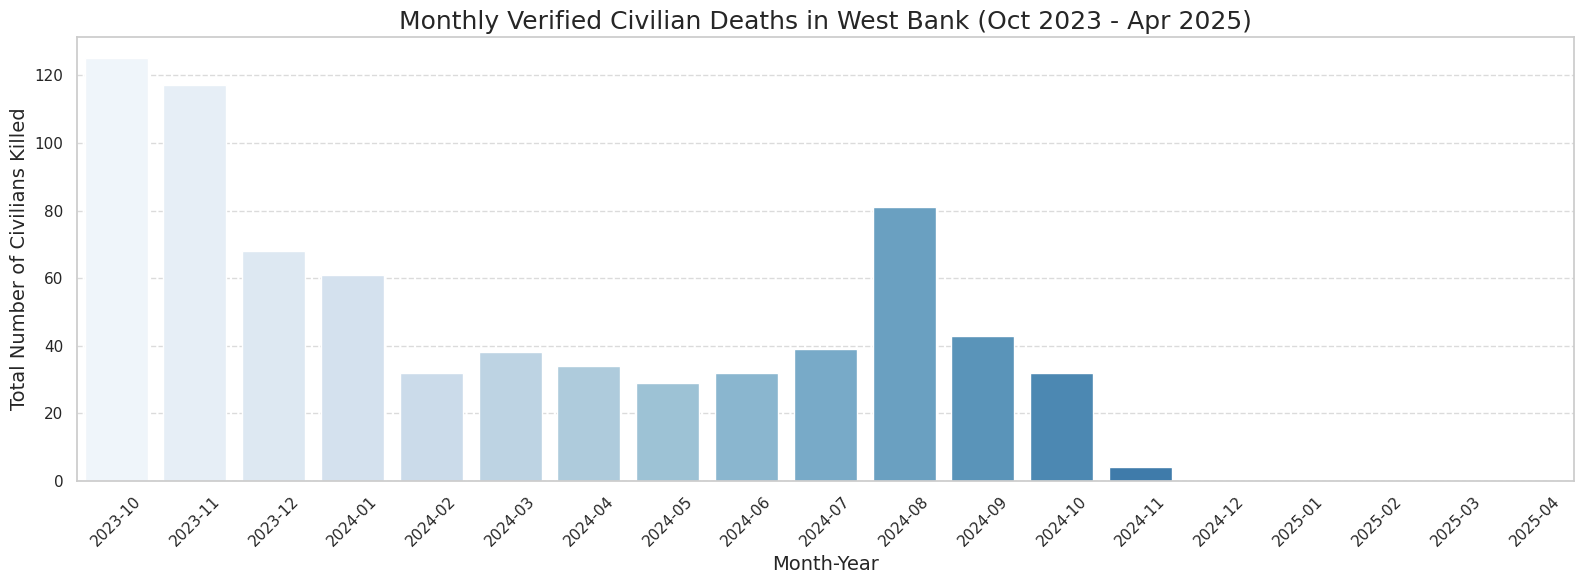

In [ ]:
# Create 'month_year' column
casualties_west_bank['month_year'] = casualties_west_bank['report_date'].dt.to_period('M')

# Group by month and sum verified.killed
monthly_wb_casualties = casualties_west_bank.groupby('month_year')['verified.killed'].sum().reset_index()

# Convert month_year to string
monthly_wb_casualties['month_year'] = monthly_wb_casualties['month_year'].astype(str)

# Plot Monthly Casualties Bar Chart
plt.figure(figsize=(16,6))
sns.barplot(data=monthly_wb_casualties, x='month_year', y='verified.killed', palette='Blues')
plt.title('Monthly Verified Civilian Deaths in West Bank (Oct 2023 - Apr 2025)', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Number of Civilians Killed', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Press Fatalities EDA

In [ ]:
# Load the Press Fatalities dataset
press_killed = pd.read_csv('cleaned_press_killed_in_gaza.csv')

# Preview
press_killed.head()

,name,name_en,notes
0,محمد الصالحي,Muhammad al-Salhi,"Al-Salhi, a photojournalist working for the Fo..."
1,ابراهيم لافي,Ibrahem Lafii,"Ibrahim Mohammad Lafi, a photographer for Ain ..."
2,محمد جرغون,Muhammad Jarghoun,"Jarghoun, a journalist with Smart Media, was s..."
3,أسعد شملخ,Assad Shmlkh,"Shamlakh, a freelance journalist, was killed a..."
4,سعيد الطويل,Saeed Altoil,"Al-Taweel, editor-in-chief of the Al-Khamsa Ne..."


In [ ]:
print(press_killed.columns.tolist())

['name', 'name_en', 'notes']


In [ ]:
# Total journalists killed
total_press_killed = press_killed.shape[0]
print(f"Total journalists killed: {total_press_killed}")

Total journalists killed: 209


### Infrastructure Damage EDA


In [ ]:
print(infrastructure.columns.tolist())

['report_date', 'civic_buildings_ext_destroyed', 'educational_buildings_ext_destroyed', 'educational_buildings_ext_damaged', 'places_of_worship_ext_mosques_destroyed', 'places_of_worship_ext_mosques_damaged', 'places_of_worship_ext_churches_destroyed', 'residential_ext_destroyed', 'residential_destroyed', 'civic_buildings_destroyed', 'educational_buildings_destroyed', 'educational_buildings_damaged', 'places_of_worship_mosques_destroyed', 'places_of_worship_mosques_damaged', 'places_of_worship_churches_destroyed']


In [ ]:
!pip install squarify

In [2]:
!pip install squarify

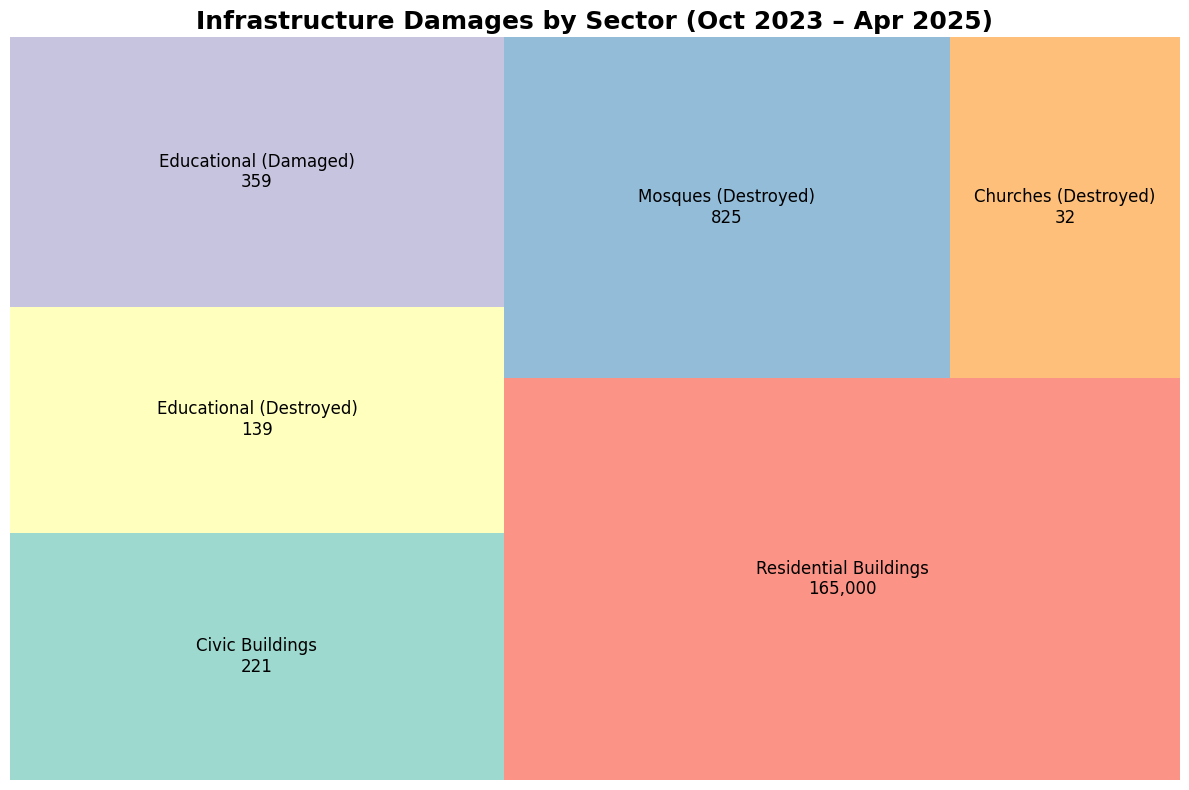

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Raw Data
sector_counts = {
    'Civic Buildings': 221,
    'Educational (Destroyed)': 139,
    'Educational (Damaged)': 359,
    'Residential Buildings': 165000,
    'Mosques (Destroyed)': 825,
    'Churches (Destroyed)': 32
}

# Apply log transformation to flatten the visual difference
log_sizes = [np.log10(v) for v in sector_counts.values()]
labels = [f"{k}\n{v:,}" for k, v in sector_counts.items()]

# Plot Treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=log_sizes,
    label=labels,
    alpha=0.85,
    color=plt.cm.Set3.colors,
    text_kwargs={'fontsize': 12}
)
plt.title('Infrastructure Damages by Sector (Oct 2023 – Apr 2025)', fontsize=18, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


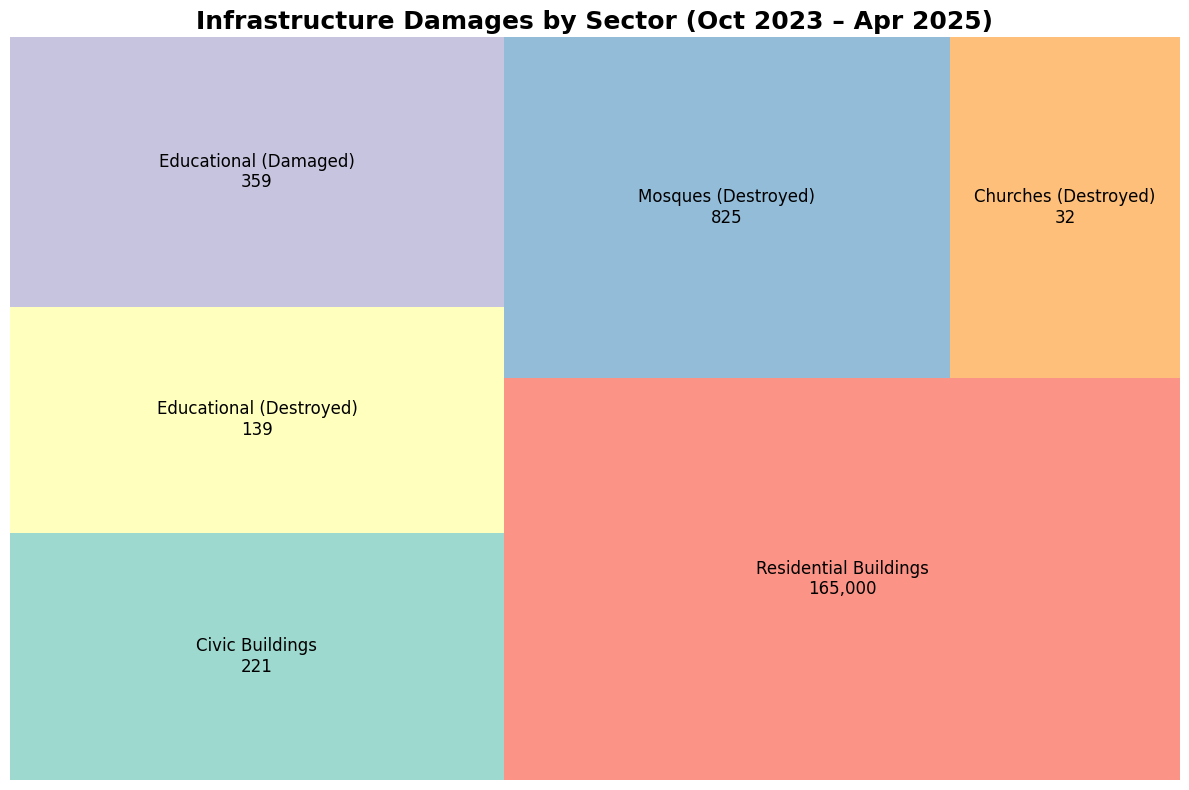

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np

# Raw Data
sector_counts = {
    'Civic Buildings': 221,
    'Educational (Destroyed)': 139,
    'Educational (Damaged)': 359,
    'Residential Buildings': 165000,
    'Mosques (Destroyed)': 825,
    'Churches (Destroyed)': 32
}

# Apply log transformation to flatten the visual difference
log_sizes = [np.log10(v) for v in sector_counts.values()]
labels = [f"{k}\n{v:,}" for k, v in sector_counts.items()]

# Plot Treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=log_sizes,
    label=labels,
    alpha=0.85,
    color=plt.cm.Set3.colors,
    text_kwargs={'fontsize': 12}
)
plt.title('Infrastructure Damages by Sector (Oct 2023 – Apr 2025)', fontsize=18, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()
